<div align="center">
    
# Movie Analysis

## Moringa x Flatiron Phase 1 Project


> Author: [Mithamo Beth](https://github.com/Mythamor) 
</div>

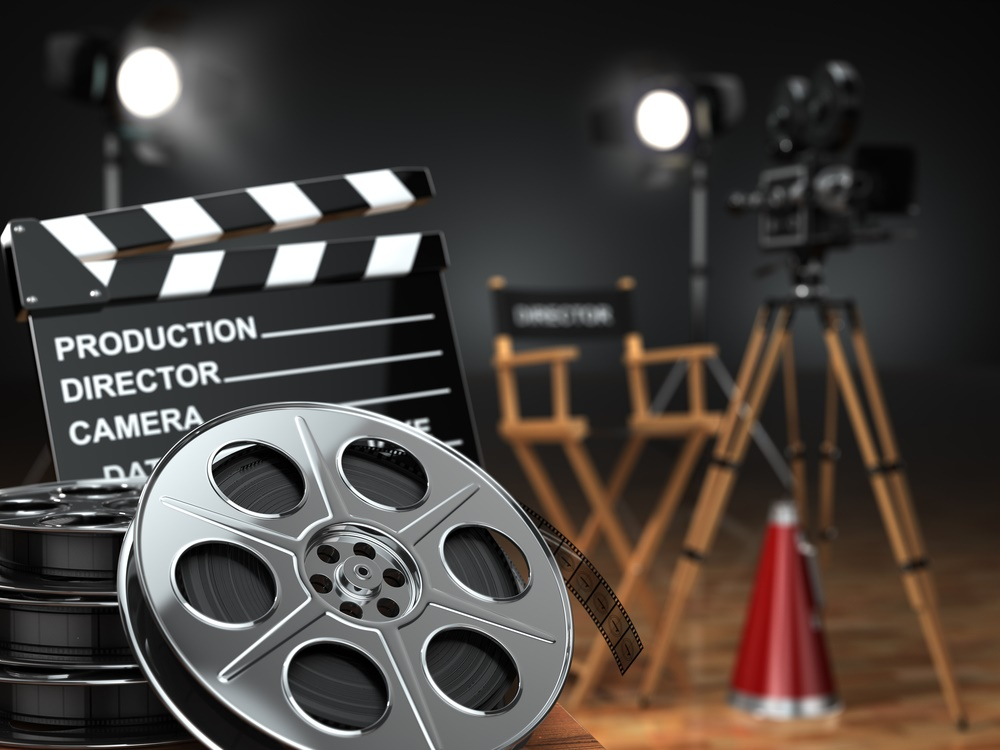

## Business Understanding

### Overview
For this project, I will use exploratory data analysis to generate insights for a business stakeholder, Microsoft, who wants to venture into movie production.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I will explore what types of films are currently doing the best at the box office, and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


### Objectives
1. The highest grossing movie genres.


2. Movie genres with the highest ratings.


3. Focus on creating original content: Many of the most successful movies in recent years have been based on original ideas rather than sequels or adaptations. Microsoft should focus on creating unique and original content to stand out in a crowded market and attract audiences.


4. Popularity of different movie genres: By analyzing user ratings and reviews, Microsoft can identify the most popular movie genres among moviegoers. This can help the studio prioritize its movie productions to cater to popular demand.


5. Highest grossing movie studios and brands, for competitior analysis


6. Box office performance of different movies: Analyzing box office performance data on movie websites can help Microsoft understand the factors that contribute to a movie's success or failure. This can inform the studio's decisions on production budgets, marketing strategies, and distribution channels.


7. Impact of movie reviews and ratings: Analyzing the correlation between user ratings and reviews and box office performance can help Microsoft understand the influence of critics and audiences on a movie's success. This can inform the studio's decisions on marketing and promotion strategies.


8. Correlation of production budgets and the revenue collected from movies.

## Data Understanding
Our data is a combination of scraped data from the websites listed below and datasets provided by Flatiron.

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)


## Web Scraping - Cleaning and EDA

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import zipfile

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#scraping libraries
import requests
from bs4 import BeautifulSoup

In [3]:
#scrape for popular genre data on the Box Office Mojo website
url = 'https://www.boxofficemojo.com/genre/?ref_=bo_nb_bns_secondarytab'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup.title.text

'Genre Keywords (US & Canada) - Box Office Mojo'

In [4]:
# Find the table element with the box office data
table = soup.find_all('table')[0]

# Convert the table into a DataFrame
df = pd.read_html(str(table))[0]

# Print the first few rows of the DataFrame
df

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Adventure,"$71,099,811,450",884,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
1,3D,"$51,647,203,552",396,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
2,Heroine,"$8,515,583,018",82,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
3,Supernatural,"$61,995,952,143",757,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
4,IMAX,"$57,427,652,084",375,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
...,...,...,...,...,...
239,Stand-up Comedy Performance,"$254,847,429",25,Eddie Murphy: Raw,"$50,504,655"
240,New Jersey,"$286,409,862",25,Cop Land,"$44,862,187"
241,Twentysomething Character,"$273,036,581",30,About Last Night,"$38,702,310"
242,Anthology,"$146,953,739",36,Twilight Zone: The Movie,"$29,450,919"


> **The dataframe above shows the highest grossing movies of all time in their respective genres.**

In [5]:
# Investigate properties of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Genre           244 non-null    object
 1   Total           244 non-null    object
 2   Titles          244 non-null    int64 
 3   #1 Title        244 non-null    object
 4   Lifetime Gross  244 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.7+ KB


In [6]:
#change data types of Total and Lifetime Gross from object to float

df['Total'] = df['Total'].str.replace("[$,]", "", regex=True).astype(float)
df['Lifetime Gross'] = df['Lifetime Gross'].str.replace("[$,]", "", regex=True).astype(float)

#rename columns to reflect the dollar value
df = df.rename(columns={"Total": "$ Total", "Lifetime Gross":"$ Lifetime Gross"})

print(df.head())

print("\n--------------------------------------\n")
print(df.info())

          Genre       $ Total  Titles  \
0     Adventure  7.109981e+10     884   
1            3D  5.164720e+10     396   
2       Heroine  8.515583e+09      82   
3  Supernatural  6.199595e+10     757   
4          IMAX  5.742765e+10     375   

                                     #1 Title  $ Lifetime Gross  
0  Star Wars: Episode VII - The Force Awakens       936662225.0  
1  Star Wars: Episode VII - The Force Awakens       936662225.0  
2  Star Wars: Episode VII - The Force Awakens       936662225.0  
3  Star Wars: Episode VII - The Force Awakens       936662225.0  
4  Star Wars: Episode VII - The Force Awakens       936662225.0  

--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genre             244 non-null    object 
 1   $ Total           244 non-null    float64
 2   Titles            2

> We have zero null values in the dataframe, we will therefore proceed to perform some cleaning and exploratory data analysis (EDA) on the dataset.

> **Lifetime Gross** refers to the total revenue grossed by an  individual movie, based on the Title.

> **Total** is the amount grossed on all the genres. There are multiple movies in each genre as indicated by the Title column. However, in this case only the  **#1 Title** is mentioned.

>"Lifetime Gross" or "Total Gross" refers to the cumulative revenue generated by a movie from its initial release until the end of its theatrical exhibition. This includes all ticket sales domestically (in the movie's country of origin) and internationally (in other countries where it was screened). The revenue may also include any additional income from special screenings, re-releases, extended runs, or other events associated with the movie's theatrical distribution.

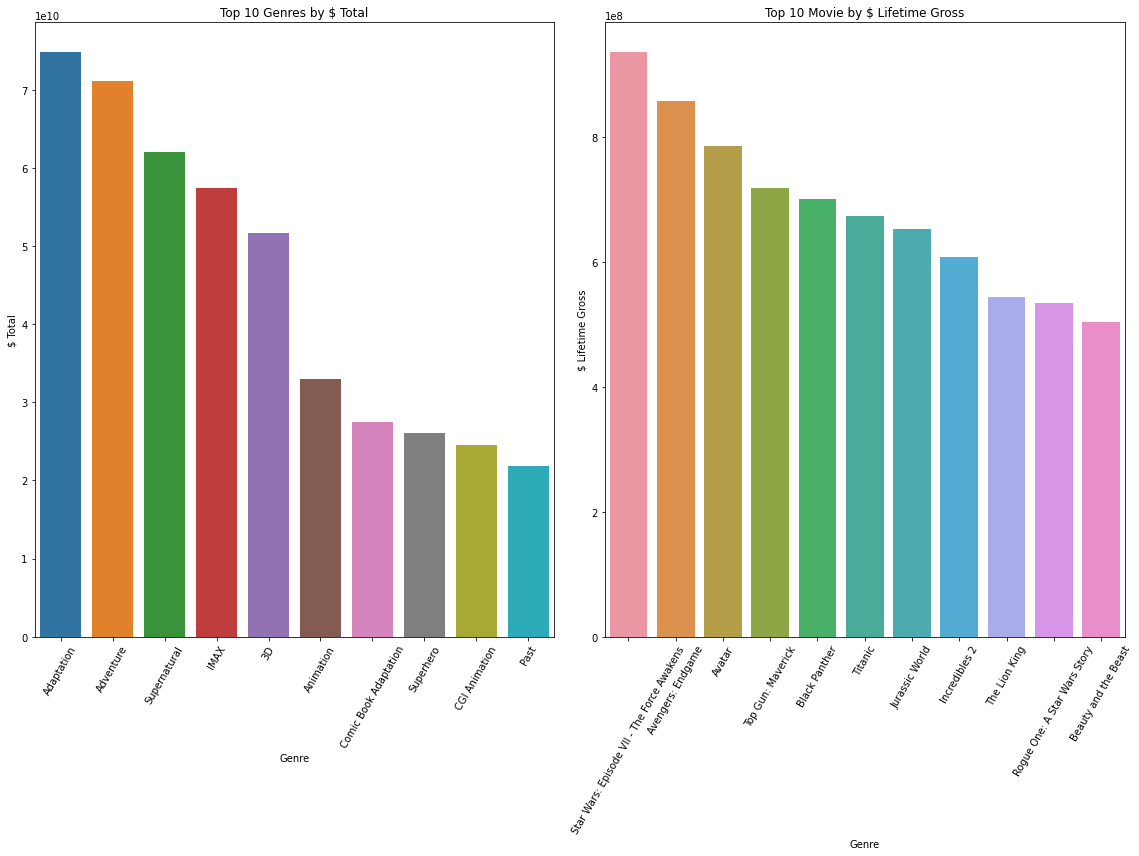

In [7]:
# Check for the genres with the highest total and lifetime gross earnings

# Sort the DataFrame by '$ Total', and '$ Lifetime Gross' column in descending order
df_sorted1 = df.sort_values('$ Total', ascending=False)
df_sorted2 = df.sort_values('$ Lifetime Gross', ascending=False)

# Select the top 10 genres based on the sorted DataFrame
top_10_total = df_sorted1.head(10)

# The lifetime gross will be grouped, based on #1 movie, hence the higher head value
top_10_lt = df_sorted2.head(30)

# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))

# Create the bar plot for $ Total
sns.barplot(data=top_10_total, x='Genre', y='$ Total', ax=ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('$ Total')
ax1.set_title('Top 10 Genres by $ Total')
ax1.tick_params(axis='x', rotation=60)

# Convert DataFrameGroupBy object back to DataFrame
grouped_df = top_10_lt.groupby(["#1 Title"]).mean().sort_values(by='$ Lifetime Gross', ascending=False).reset_index()

# Create the bar plot for $ Lifetime Gross
sns.barplot(data=grouped_df, x='#1 Title', y='$ Lifetime Gross',ax=ax2)

ax2.set_xlabel('Genre')
ax2.set_ylabel('$ Lifetime Gross')
ax2.set_title('Top 10 Movie by $ Lifetime Gross')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
#Genres of the top 3 films:
titles = ['Avatar', 'Avengers: Endgame', 'Star Wars: Episode VII - The Force Awakens']
filtered_genre = df.loc[df['#1 Title'].isin(titles),'Genre']
filtered_genre.value_counts()

IMAX                              1
Environmentalist                  1
Time Travel                       1
Adventure                         1
Superhero                         1
Adaptation                        1
Invasion                          1
Affliction                        1
Alien Invasion                    1
Supernatural                      1
Conflict                          1
Comic Book Adaptation             1
3D                                1
Physically Afflicted Character    1
Heroine                           1
Afflicted Character               1
Name: Genre, dtype: int64

In [9]:
# This is a textual explanation of the Lifetime Gross visualization above
top_10_lt = df_sorted2.head(30)
grouped_df = top_10_lt.groupby(["#1 Title"]).mean().sort_values(by='$ Lifetime Gross', ascending=False).reset_index()
grouped_df = grouped_df[['#1 Title', '$ Lifetime Gross']]
grouped_df

,#1 Title,$ Lifetime Gross
0,Star Wars: Episode VII - The Force Awakens,936662225.0
1,Avengers: Endgame,858373000.0
2,Avatar,785221649.0
3,Top Gun: Maverick,718732821.0
4,Black Panther,700426566.0
5,Titanic,674292608.0
6,Jurassic World,653406625.0
7,Incredibles 2,608581744.0
8,The Lion King,543638043.0
9,Rogue One: A Star Wars Story,533539991.0


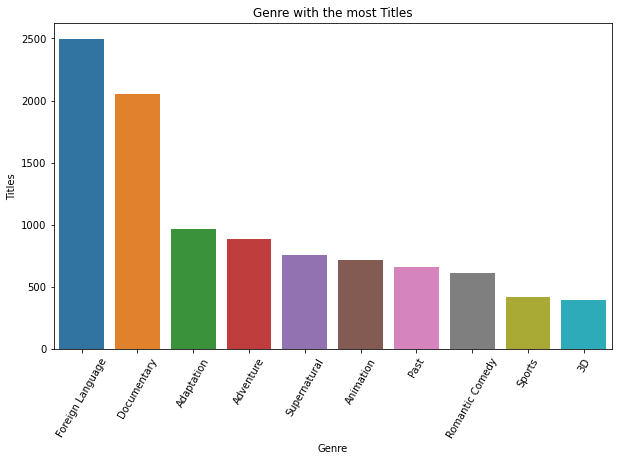

In [10]:
# Genre with the most no. of titles
# Sort the DataFrame by '$ Total' column in descending order
df_sorted = df.sort_values('Titles', ascending=False)

# Select the top 10 genres based on the sorted DataFrame
top_10_titles = df_sorted.head(10)
#check for correlation between the number of titles and the total gross
# set the figure size
figure = plt.figure(figsize=(10,6))

#plot the barplot for comparison
sns.barplot(data=top_10_titles.sort_values(by='Titles', ascending=False), y="Titles", x='Genre' )
plt.title('Genre with the most Titles')
plt.xticks(rotation=60)
plt.show();

In [11]:
#Create a new column 'Total Genre Count' to show the total number of time a title appears in Genre
df['Total Genre Count'] = df.groupby('#1 Title')['Genre'].transform('nunique')
df.head()

,Genre,$ Total,Titles,#1 Title,$ Lifetime Gross,Total Genre Count
0,Adventure,7.109981e+10,884,Star Wars: Episode VII - The Force Awakens,936662225.0,5
1,3D,5.164720e+10,396,Star Wars: Episode VII - The Force Awakens,936662225.0,5
2,Heroine,8.515583e+09,82,Star Wars: Episode VII - The Force Awakens,936662225.0,5
3,Supernatural,6.199595e+10,757,Star Wars: Episode VII - The Force Awakens,936662225.0,5
4,IMAX,5.742765e+10,375,Star Wars: Episode VII - The Force Awakens,936662225.0,5


In [12]:
# check for the count of movies that feature as the number #1 
duplicated_titles = df[df['#1 Title'].duplicated(keep=False)]
duplicated_titles_count = duplicated_titles['#1 Title'].value_counts()

# movies that feature as the #1 Title in multiple genres
print(duplicated_titles_count.head(10))

Pirates of the Caribbean: Dead Man's Chest    8
Avengers: Endgame                             7
The Hangover                                  6
The Da Vinci Code                             5
Transformers: Revenge of the Fallen           5
The Departed                                  5
Ted                                           5
The Matrix Reloaded                           5
Star Wars: Episode VII - The Force Awakens    5
The Hunger Games: Catching Fire               4
Name: #1 Title, dtype: int64


In [13]:
#check for the correlation between the 'Total Genre Count' and 'Lifetime Gross' 
corr = df[['Total Genre Count','$ Lifetime Gross']].corr()
corr

,Total Genre Count,$ Lifetime Gross
Total Genre Count,1.000000,0.461159
$ Lifetime Gross,0.461159,1.000000


In [14]:
"'Total Genre Count' and 'Lifetime Gross', have a correlation of 0.46. It is not strong enough to justify that a movie featuring\
in multiple genres, automatically means, the movie will genearte high revenue."

"'Total Genre Count' and 'Lifetime Gross', have a correlation of 0.46. It is not strong enough to justify that a movie featuringin multiple genres, automatically means, the movie will genearte high revenue."

In [15]:
#create a new column showing frequency of #1 Title appears in Genres
top_genre_count = df['Total Genre Count'].value_counts(normalize=True).sort_values(ascending=False)
print("top_genre_count:\n",top_genre_count)

top_genre_count:
 1    0.307377
2    0.245902
3    0.122951
5    0.122951
4    0.114754
8    0.032787
7    0.028689
6    0.024590
Name: Total Genre Count, dtype: float64


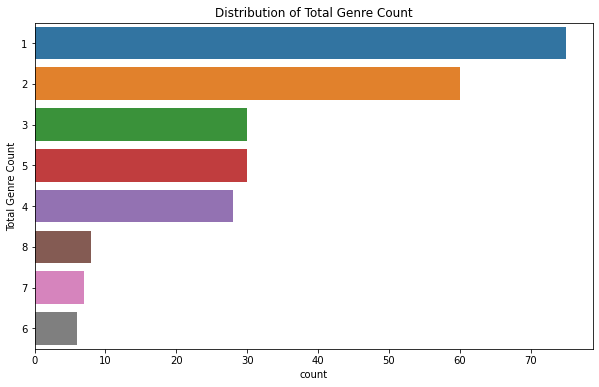

In [16]:
#visualize the above observation
figure = plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, y='Total Genre Count', order=top_genre_count.index)

plt.title('Distribution of Total Genre Count')

plt.show()

In [17]:
print("30% of the movies feature in only one genre. From the visualization, the count reduces as the number of genres increase.")

30% of the movies feature in only one genre. From the visualization, the count reduces as the number of genres increase.


In [18]:
#check for correlation among the features
high_correlation = df.corr().where(df.corr()>= 0.6)
high_correlation

,$ Total,Titles,$ Lifetime Gross,Total Genre Count
$ Total,1.000000,NaN,0.619007,NaN
Titles,NaN,1.0,NaN,NaN
$ Lifetime Gross,0.619007,NaN,1.000000,NaN
Total Genre Count,NaN,NaN,NaN,1.0


In [19]:
"$ Total & $ Lifetime Gross have a strong positive correlation." 

'$ Total & $ Lifetime Gross have a strong positive correlation.'

### More scraping to identify competitors

In [20]:
#scrape movie brand data on the Box Office Mojo website

url = 'https://www.boxofficemojo.com/brand/?ref_=bo_nb_frs_secondarytab'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup.title.text

# Find the table element with the box office data
table = soup.find_all('table')[0]

# Convert the table into a DataFrame
df1 = pd.read_html(str(table))[0]

# Print the first few rows of the DataFrame
df1.head()

,Brand,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Comics,"$17,130,564,593",74,Avengers: Endgame,"$858,373,000"
1,Legendary Pictures,"$7,020,120,489",64,Jurassic World,"$652,270,625"
2,DC Comics,"$6,447,468,590",61,The Dark Knight,"$533,345,358"
3,Lucasfilm,"$6,333,648,984",42,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
4,Pixar,"$6,078,217,662",28,Incredibles 2,"$608,581,744"


In [21]:
#investigate the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           46 non-null     object
 1   Total           46 non-null     object
 2   Releases        46 non-null     int64 
 3   #1 Release      46 non-null     object
 4   Lifetime Gross  46 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.9+ KB


In [22]:
#change columns from object to numerical
df1['Total'] = df1['Total'].str.replace("[$,]", "", regex=True).astype(float)
df1['Lifetime Gross'] = df1['Lifetime Gross'].str.replace("[$,]", "", regex=True).astype(float)

#rename columns to reflect the dollar value
df1 = df1.rename(columns={"Total": "$ Total", "Lifetime Gross":"$ Lifetime Gross"})

df1 = df1.sort_values(by='$ Lifetime Gross', ascending=False)
df1.head()

,Brand,$ Total,Releases,#1 Release,$ Lifetime Gross
8,Bad Robot,3.077079e+09,15,Star Wars: Episode VII - The Force Awakens,936662225.0
3,Lucasfilm,6.333649e+09,42,Star Wars: Episode VII - The Force Awakens,936662225.0
0,Marvel Comics,1.713056e+10,74,Avengers: Endgame,858373000.0
1,Legendary Pictures,7.020120e+09,64,Jurassic World,652270625.0
4,Pixar,6.078218e+09,28,Incredibles 2,608581744.0


In [23]:
#Top 10 brands with the highest lifetime grossing movies
top_10_lg_brands = df1.sort_values(by ='$ Lifetime Gross', ascending=False)
top_10_lg_brands = top_10_lg_brands[['Brand','$ Lifetime Gross']].reset_index(drop=True)
print("top_10_lg_brands:\n",top_10_lg_brands.head(10))
print("------------------------------------------------\n")

#Top 10 brands with the highest total grossing
top_10_total_brands = df1.sort_values(by ='$ Total', ascending=False)
top_10_total_brands = top_10_total_brands[['Brand', '$ Total']].reset_index(drop=True)
print("top_10_total_brands:\n",top_10_total_brands.head(10))
print("------------------------------------------------\n")

top_10_lg_brands:
                            Brand  $ Lifetime Gross
0                      Bad Robot       936662225.0
1                      Lucasfilm       936662225.0
2                  Marvel Comics       858373000.0
3             Legendary Pictures       652270625.0
4                          Pixar       608581744.0
5                      DC Comics       533345358.0
6  Walt Disney Animation Studios       477373578.0
7           DreamWorks Animation       441226247.0
8                         Hasbro       402111870.0
9     Illumination Entertainment       369695210.0
------------------------------------------------

top_10_total_brands:
                            Brand       $ Total
0                  Marvel Comics  1.713056e+10
1             Legendary Pictures  7.020120e+09
2                      DC Comics  6.447469e+09
3                      Lucasfilm  6.333649e+09
4                          Pixar  6.078218e+09
5           DreamWorks Animation  6.077261e+09
6          Vertigo 

In [24]:
#brands with the highest number of movie releases
highest_releases = df1.loc[df1['Releases'].nlargest(10).index]
highest_releases

,Brand,$ Total,Releases,#1 Release,$ Lifetime Gross
0,Marvel Comics,1.713056e+10,74,Avengers: Endgame,858373000.0
1,Legendary Pictures,7.020120e+09,64,Jurassic World,652270625.0
2,DC Comics,6.447469e+09,61,The Dark Knight,533345358.0
16,Stephen King,1.730093e+09,53,It,327481748.0
10,Blumhouse Productions,2.516081e+09,51,Get Out,176040665.0
6,Vertigo Entertainment,3.155525e+09,49,It,327481748.0
5,DreamWorks Animation,6.077261e+09,48,Shrek 2,441226247.0
41,Amazon Studios,2.043760e+08,43,Manchester by the Sea,47695371.0
3,Lucasfilm,6.333649e+09,42,Star Wars: Episode VII - The Force Awakens,936662225.0
14,Walden Media,1.842880e+09,39,"The Chronicles of Narnia: The Lion, the Witch ...",291710957.0


In [25]:
#check for the correlation between the number of releases and the lifetime gross
df1[['Releases','$ Lifetime Gross']].corr()

,Releases,$ Lifetime Gross
Releases,1.000000,0.505775
$ Lifetime Gross,0.505775,1.000000


In [26]:
print("The 'Releases' and 'Lifetime Gross' columns have a medium positive correlation. Not strong enough to establish causation.")

The 'Releases' and 'Lifetime Gross' columns have a medium positive correlation. Not strong enough to establish causation.


## Flatiron Datasets - Cleaning and EDA

> **Title basics and ratings datasets**

In [27]:
# Load the title basics dataset
df2 = pd.read_csv("zippedData/title.basics.csv")
print(df2.shape)
df2.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [28]:
#Load title ratings dataset
df3 = pd.read_csv("zippedData/title.ratings.csv")
print(df3.shape)
df3.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [29]:
#merge the two datasets
movies_df = pd.merge(df2, df3, on='tconst', how='left')
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


All the 4 datasets have varying shapes:

>The title basics dataset : 6 columns, 146,144rows

>The title ratings dataset: 3 columns,  73,856 rows

>The movies gross dataset : 5 columns,   3,387 rows

>The movies budgets dataset : 6 columns,   5,782 rows

As observed, the title basics and the ratings dataset can be joined, as they share an index. There will be almost 50% of missing values for the average ratings and number of votes columns.The movie gross & budgets datasets will be explored separately.

In [30]:
#check for missing values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [31]:
#All these values are very unique, we will thus fill them with 0 for numerical columns
#NA for categorical columns
movies_df['original_title'] = movies_df['original_title'].fillna('NA')
movies_df['genres'] = movies_df['genres'].fillna('NA')

movies_df['runtime_minutes'] = movies_df['runtime_minutes'].fillna(0)
movies_df['averagerating'] = movies_df['averagerating'].fillna(0)
movies_df['numvotes'] = movies_df['numvotes'].fillna(0)

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    146144 non-null  float64
 7   numvotes         146144 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [32]:
#explore the statistics of the movies dataframe
movies_df.describe().round()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.0,146144.0,146144.0,146144.0
mean,2015.0,67.0,3.0,1781.0
std,3.0,151.0,3.0,21608.0
min,2010.0,0.0,0.0,0.0
25%,2012.0,34.0,0.0,0.0
50%,2015.0,79.0,2.0,5.0
75%,2017.0,95.0,6.0,51.0
max,2115.0,51420.0,10.0,1841066.0


> The `average movie runtime` in minutes is 67 minutes.
> The `average moving rating` is 3/10, while the `average number of votes` a movie receives is 1781

In [33]:
#number of unique genres in the dataset
movies_df['genres'].nunique()

1086

In [34]:
#most common genres
common_genres = movies_df['genres'].value_counts(normalize=True).sort_values(ascending=False)
common_genres.head(10)

Documentary              0.220228
Drama                    0.147019
Comedy                   0.062794
NA                       0.037005
Horror                   0.029916
Comedy,Drama             0.024079
Thriller                 0.020842
Action                   0.015184
Biography,Documentary    0.014472
Drama,Romance            0.014226
Name: genres, dtype: float64

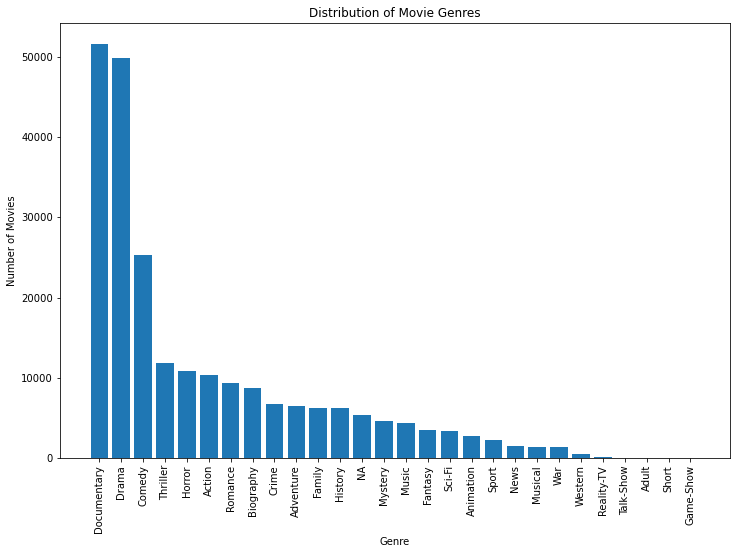

In [35]:
# Split the genres column into individual genres
genres = movies_df['genres'].str.split(',')

# Flatten the list of genres
genres = [genre for sublist in genres for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(genres).value_counts()

# Plot the distribution of genres
figure = plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Genres")
plt.xticks(rotation=90)
plt.show()


In [36]:
# Analyzing primary titles
primary_titles = movies_df['primary_title'].unique()
num_unique_primary_titles = len(primary_titles)
print(f"Number of unique primary titles: {num_unique_primary_titles}\n")

# Analyzing original titles
original_titles = movies_df['original_title'].unique()
num_unique_original_titles = len(original_titles)
print(f"Number of unique original titles: {num_unique_original_titles}\n")

# Checking if movies have different titles for different regions or languages
title_comparison = movies_df['primary_title'] != movies_df['original_title']
movies_with_different_titles = movies_df[title_comparison]
num_movies_with_different_titles = len(movies_with_different_titles)
print(f"Number of movies with different primary and original titles: {num_movies_with_different_titles}\n")

# Printing a sample of movies with different titles
print("Sample of movies with different primary and original titles:")
print(movies_with_different_titles[['primary_title', 'original_title']].head())

Number of unique primary titles: 136071

Number of unique original titles: 137774

Number of movies with different primary and original titles: 14504

Sample of movies with different primary and original titles:
                      primary_title            original_title
1   One Day Before the Rainy Season           Ashad Ka Ek Din
4          The Wandering Soap Opera     La Telenovela Errante
11             So Much for Justice!            Oda az igazság
13     Children of the Green Dragon  A zöld sárkány gyermekei
15               The Tragedy of Man       Az ember tragédiája


> More than 90% of movies dataset have the same `primary_title` and `original_title` with less than 10% of the dataset having different titles. It is therefore prudent for microsoft to use the same title for both categories

In [37]:
#check for correlation among the features
movies_df.corr().round(2)

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.00,-0.04,-0.11,-0.03
runtime_minutes,-0.04,1.00,0.11,0.03
averagerating,-0.11,0.11,1.00,0.09
numvotes,-0.03,0.03,0.09,1.00


In [38]:
"""There aren't any strong correlations among the features"""

"There aren't any strong correlations among the features"

In [39]:
#explore movies genres that receive the highest number of votes and ratings
grouped_ratings = movies_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
grouped_ratings.head(3)

genres
Music,Mystery                  9.0
Documentary,News,Reality-TV    8.8
Comedy,Drama,Reality-TV        8.8
Name: averagerating, dtype: float64

In [40]:
#num of votes 
grouped_ratings = movies_df.groupby('genres')['numvotes'].mean().sort_values(ascending=False)
grouped_ratings.head(3)

genres
Action,Adventure,Sci-Fi     151468.736842
Adventure,Mystery,Sci-Fi    108034.000000
Action,Fantasy,War           87672.666667
Name: numvotes, dtype: float64

In [41]:
#create a new column title_len
#check for correlation between the title len, ratings and #votes
movies_df['word_count'] = movies_df['primary_title'].str.split().str.len()
movies_df[['word_count','averagerating','numvotes']].corr()

,word_count,averagerating,numvotes
word_count,1.000000,-0.079291,-0.019778
averagerating,-0.079291,1.000000,0.091336
numvotes,-0.019778,0.091336,1.000000


In [42]:
print("The correlation for both 'rating' and 'numvotes' is very weak. ")

The correlation for both 'rating' and 'numvotes' is very weak. 


In [43]:
#check for the longest movies
movies_df.loc[:, ['primary_title', 'runtime_minutes', 'genres']].sort_values(by='runtime_minutes', ascending=False).head(10)

,primary_title,runtime_minutes,genres
132389,Logistics,51420.0,Documentary
44840,Modern Times Forever,14400.0,Documentary
123467,Nari,6017.0,Documentary
87264,Hunger!,6000.0,"Documentary,Drama"
88717,London EC1,5460.0,"Comedy,Drama,Mystery"
90578,Ember Glow,4980.0,"Drama,Western"
15381,Deregulation,4200.0,"Comedy,Drama"
105225,Nieuwe Tieten,4080.0,"Documentary,Drama"
12974,City of Eternal Spring,3450.0,"Documentary,Drama,News"
67437,A 2nd generation film,3077.0,Drama


<AxesSubplot:xlabel='runtime_minutes'>

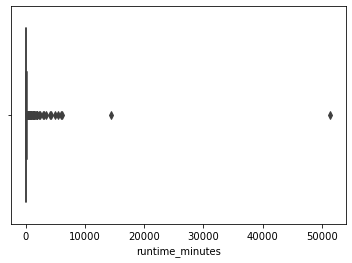

In [44]:
#check for outliers by plotting a boxplot
sns.boxplot(data=movies_df, x='runtime_minutes')

In [45]:
print("There are plenty of outliers. Let's identify and remove them")

There are plenty of outliers. Let's identify and remove them


In [46]:
#Check for outliers in the runtime_minutes column
Q3 = movies_df['runtime_minutes'].quantile(0.75)
Q1 = movies_df['runtime_minutes'].quantile(0.25)
IQR = Q3 - Q1

# Define the outlier range
upper_bound = (Q3 + 1.5*IQR) 
lower_bound = (Q1 - 1.5*IQR)

# Identify the outliers
outliers = movies_df.loc[(movies_df['runtime_minutes'] < lower_bound) | (movies_df['runtime_minutes'] > upper_bound)]

# Print the outliers
outliers

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,word_count
70,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama,7.8,6.0,3
291,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42.0,5
1199,tt10094362,The Blood Will Murder Roses,The Blood Will Murder Roses,2014,288.0,Romance,0.0,0.0,5
1284,tt10102250,Ti Dete To Deto Te Detat Saglech Detat Shivya,Ti Dete To Deto Te Detat Saglech Detat Shivya,2017,197.0,Comedy,0.0,0.0,9
1409,tt10117220,La Flor - Partie 4,La Flor - Partie 4,2019,208.0,Drama,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...
144058,tt9619578,Sizzla and Judgement Yard - From the Garrison ...,Sizzla and Judgement Yard - From the Garrison ...,2019,219.0,Documentary,0.0,0.0,11
144951,tt9743020,Beauty Lives in Freedom,Beauty Lives in Freedom,2018,330.0,Documentary,0.0,0.0,4
144977,tt9749570,Heimat Is a Space in Time,Heimat ist ein Raum aus Zeit,2019,218.0,Documentary,7.8,14.0,6
145184,tt9782956,The Phineas And Ferb Show,The Phineas And Ferb Show,2018,285.0,Comedy,0.0,0.0,5


<AxesSubplot:xlabel='runtime_minutes'>

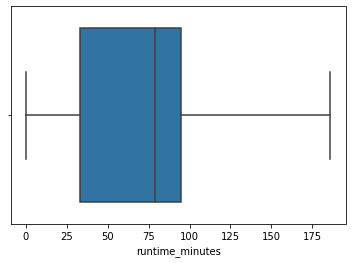

In [47]:
#drop the outliers
movies_df = movies_df.drop(outliers.index, axis=0)

#boxplot after removing outliers
sns.boxplot(data=movies_df, x='runtime_minutes')

<Figure size 864x720 with 0 Axes>

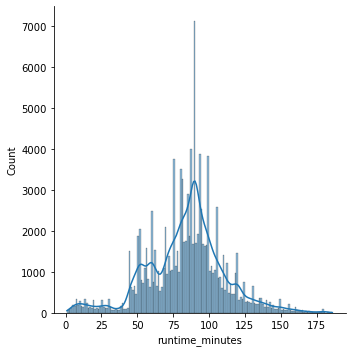

In [48]:
#plot a histogram showing the distribution of run_time minutes
# Filter the data to exclude zero values
filtered_data = movies_df[movies_df['runtime_minutes'] != 0]

figure = plt.figure(figsize=(12, 10))
sns.displot(data=filtered_data, x='runtime_minutes', kde=True)

In [49]:
#mean of the filtered runtime minutes after removing outliers, and zero values
runtime_new_stats = filtered_data['runtime_minutes'].describe()
runtime_new_stats

count    113928.000000
mean         84.320351
std          27.112868
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max         186.000000
Name: runtime_minutes, dtype: float64

In [50]:
print("The outliers were insignificant compared to the size of the dataset. There was a slight decrease in most of stats,\
but nothing significant.")

The outliers were insignificant compared to the size of the dataset. There was a slight decrease in most of stats,but nothing significant.


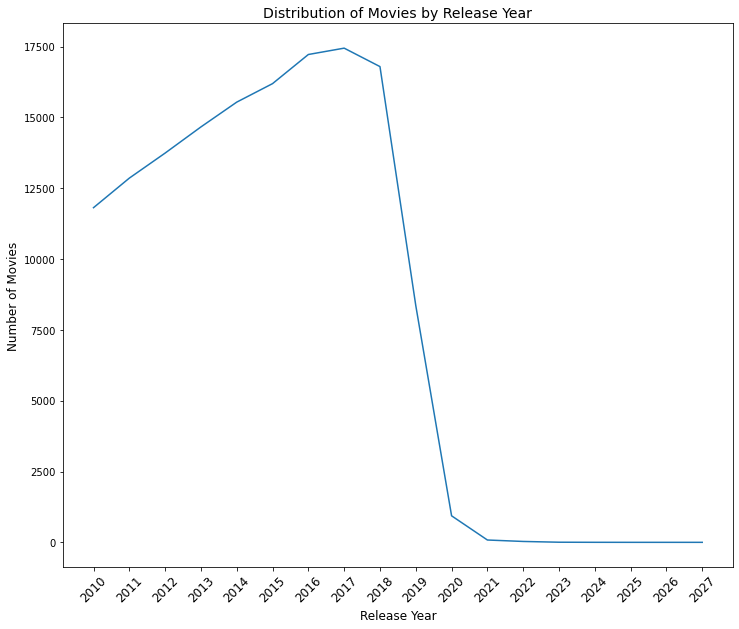

In [51]:
#analyse the movie trends over the years
#change 'start_year' column to datetime
movies_df['start_year'] = pd.to_datetime(movies_df['start_year'], format='%Y')

# Extract year from 'Date' column
movies_df['Year'] = movies_df['start_year'].dt.year

# Count the number of movies by release year
year_counts = movies_df['Year'].value_counts().sort_index()
year_counts = year_counts.drop(2115, axis=0)

# Plotting the distribution of movies by release year with limits
figure = plt.figure(figsize=(12, 10))
plt.plot(year_counts.index.astype(str), year_counts.values )

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Distribution of Movies by Release Year', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

> **Movie gross dataset**

In [52]:
#Load the movie gross dataset
df4 = pd.read_csv("zippedData/bom.movie_gross.csv")
print(df4.shape)
df4.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [53]:
#investigate the dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [54]:
#Fill the nulls with 0, it would be difficult to impute such specific data
df4 = df4.fillna(0)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [55]:
# Calculate the highest domestic gross by studio
top_dom_gross_studios = df4.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)

# Find the highest-grossing studios
top_dom_gross_studios = top_dom_gross_studios.head(10)
print("top_dom_gross_studios:", top_dom_gross_studios)
print("---------------------------------------------------------\n")

#highest grossing studios  by foreign gross
df4['foreign_gross'] = df4['foreign_gross'].str.replace("[,.]","", regex=True).astype(float)
top_fgn_gross_studios = df4.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)

# Find the highest foreign-grossing studios
top_fgn_gross_studios = top_fgn_gross_studios.head(10)
print("top_fgn_gross_studios", top_fgn_gross_studios)
print("---------------------------------------------------------\n")

#create a new column of total gross revenue collected
df4['total_gross'] = df4['domestic_gross'] + df4['foreign_gross']

# Calculate the highest domestic gross by studio
top_gross_studios = df4.groupby('studio')['total_gross'].sum().sort_values(ascending=False)

# Find the highest-grossing studios
top_gross_studios = top_gross_studios.head(10)
print("top_gross_studios", top_gross_studios)
print("---------------------------------------------------------\n")

top_dom_gross_studios: studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.459683e+09
Par.       7.685871e+09
LGF        4.118963e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64
---------------------------------------------------------

top_fgn_gross_studios studio
BV         2.579388e+10
Fox        2.005587e+10
WB         1.866790e+10
Uni.       1.685480e+10
Sony       1.394535e+10
Par.       1.186338e+10
WB (NL)    6.339000e+09
LGF        4.482619e+09
P/DW       3.393600e+09
LG/S       3.353724e+09
Name: foreign_gross, dtype: float64
---------------------------------------------------------

top_gross_studios studio
BV         4.419041e+10
Fox        3.098037e+10
WB         3.079150e+10
Uni.       2.974684e+10
Sony       2.240483e+10
Par.       1.944420e+10
WB (NL)    1.031410e+10
LGF        8.474471e+09
LG/S       5.318924e+09
P/DW       5.076500e+09
Name:

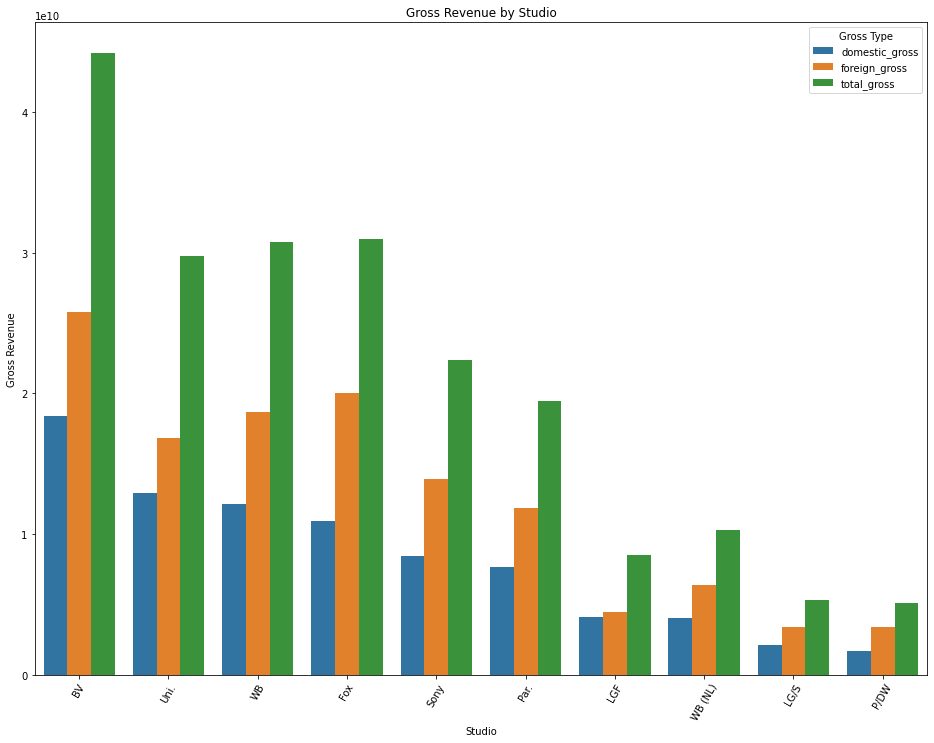

In [56]:
# Concatenate the two gross reenue DataFrames
x = top_dom_gross_studios.to_frame()
y = top_fgn_gross_studios.to_frame()
z= top_gross_studios.to_frame()

#merge the dataframes to get the common studios
gross_df = pd.concat([x,y,z], axis=1)
gross_df = gross_df.reset_index().rename(columns={"index":"studio"})

# Melt the DataFrame to convert the columns into a single 'gross_type' column
melted_df = gross_df.melt(id_vars='studio', var_name='gross_type', value_name='gross')

#set the figure size
figure = plt.figure(figsize=(16, 12))
# Plotting the grouped bar chart
sns.barplot(x='studio', y='gross', hue='gross_type',data=melted_df)

# Customize the plot
plt.title("Gross Revenue by Studio")
plt.xlabel("Studio")
plt.ylabel("Gross Revenue")
plt.xticks(rotation=60)
plt.legend(title='Gross Type')

# Show the plot
plt.show();

> The foreign gross revenue collected is higher compared to the domestic gross.

In [57]:
# check for studio with most movies grossing highest amount
row_with_highest_gross = df4.nlargest(10, 'total_gross')
row_with_highest_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [58]:
"Very interesting statistic here. BV Studio has produced 80% of the top 10 movies with the highest total gross revenue \
worldwide"

'Very interesting statistic here. BV Studio has produced 80% of the top 10 movies with the highest total gross revenue worldwide'

In [59]:
#highest grossing movies and their respective studios
highest_total_gross_movie = df4.loc[df4['total_gross'].idxmax()]
print("highest_total_gross_movie:",highest_total_gross_movie)
print("---------------------------------------------------------\n")

highest_domestic_gross_movie = df4.loc[df4['domestic_gross'].idxmax()]
print("highest_domestic_gross_movie:",highest_domestic_gross_movie)
print("---------------------------------------------------------\n")

highest_foreign_gross_movie = df4.loc[df4['foreign_gross'].idxmax()]
print("highest_foreign_gross_movie:",highest_foreign_gross_movie)
print("---------------------------------------------------------\n")

highest_total_gross_movie: title             Marvel's The Avengers
studio                               BV
domestic_gross                6.234e+08
foreign_gross                 8.955e+08
year                               2012
total_gross                  1.5189e+09
Name: 727, dtype: object
---------------------------------------------------------

highest_domestic_gross_movie: title             Star Wars: The Force Awakens
studio                                      BV
domestic_gross                       9.367e+08
foreign_gross                            11316
year                                      2015
total_gross                        9.36711e+08
Name: 1872, dtype: object
---------------------------------------------------------

highest_foreign_gross_movie: title             Harry Potter and the Deathly Hallows Part 2
studio                                                     WB
domestic_gross                                       3.81e+08
foreign_gross                        

> **Movie budgets dataset**

In [60]:
#Load the movie budgets dataset
df5 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(df5.shape)
df5.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [61]:
# Investigate the dataframe
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [62]:
#change values that should be numerical to float
df5['production_budget'] = df5['production_budget'].str.replace("[$,]","", regex=True).astype(float)
df5['domestic_gross'] = df5['domestic_gross'].str.replace("[$,]","", regex=True).astype(float)
df5['worldwide_gross'] = df5['worldwide_gross'].str.replace("[$,]","", regex=True).astype(float)

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [63]:
#production statistics
df5['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

<AxesSubplot:xlabel='production_budget'>

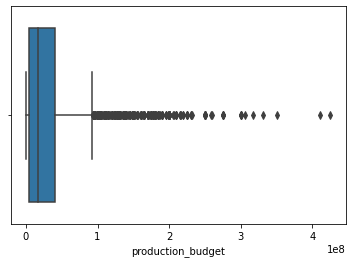

In [64]:
#check for the outliers
sns.boxplot(data=df5, x='production_budget')

In [65]:
# Calculate z-scores for the 'Salary' column
z_scores = np.abs((df5['production_budget'] - df5['production_budget'].mean()) / df5['production_budget'].std())

# Set a threshold for z-score to identify outliers
threshold = 3

# Identify and drop outliers
df5_no_outliers = df5[z_scores <= threshold]

# check the production budget statistics
df5_no_outliers['production_budget'].describe()

count    5.636000e+03
mean     2.716602e+07
std      3.103828e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.600000e+07
75%      3.800000e+07
max      1.560000e+08
Name: production_budget, dtype: float64

In [66]:
print("After dropping the outliers, the mean drops by $ 10M . The other statistics changed significantly as well.")

After dropping the outliers, the mean drops by $ 10M . The other statistics changed significantly as well.


<AxesSubplot:xlabel='production_budget'>

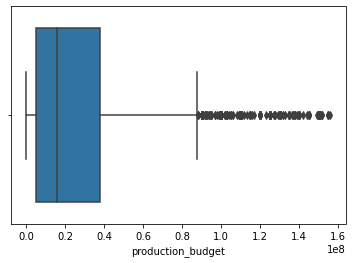

In [67]:
#chec the boxplot again, to confirm that most of the outliers have been dropped
sns.boxplot(data=df5_no_outliers, x='production_budget')

<Figure size 864x576 with 0 Axes>

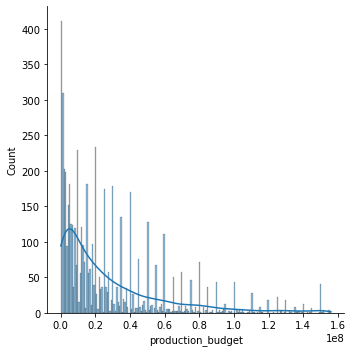

In [68]:
#plot the distribution of the production budget
figure = plt.figure(figsize=(12, 8))

sns.displot(data=df5_no_outliers, x='production_budget', bins=200, kde=True)
plt.show();

In [69]:
#check for correlation between the production budget and the amount grossed
df5.corr()

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


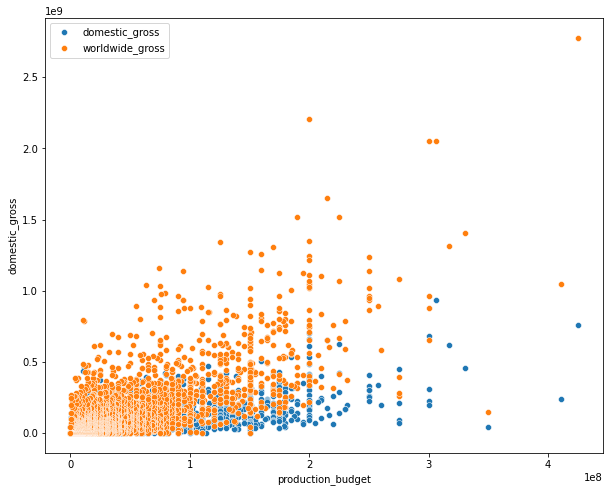

In [70]:
# Plot gross revenue scatter plots using seaborn
figure = plt.figure(figsize=(10,8 ))
sns.scatterplot(data=df5, x='production_budget', y='domestic_gross')
sns.scatterplot(data=df5, x='production_budget', y='worldwide_gross')

# Add a legend
plt.legend(['domestic_gross', 'worldwide_gross'])

# Show the plot
plt.show()

> Production budget has a  strong positive correlation with the both the domestic_gross and the worldwide_gross.
Hence, Microsoft should ensure their movies have a substantial budget.

# Data Insights and Recommendations:
We have explored various datasets from different movie websites. In addition to the provided datasets, we also scraped some data
for further analysis. 

**Based on the above findings, Microsoft should invest in:**

1. According to the scraped dataset from box office mojo, the top 3 highest grossing genres based on 2 different datasets were:
* Adaptation, Adventure & Supernatural.
* Documentary, Drama, Comedy
    
2. Top 3 movies: 
* Star Wars Episode V11
* Avenger: Endgame
* Avatar
     
3. Top 3 brands by total grossing revenue and number of releases were:
* Marvel Comics
* Legendary Pictures
* DC Comics respectively
    
4. The average movie rating is 3.0
    
5. The top 3 genres with the highest ratings were:
* Music,Mystery                  9.0
* Documentary,News,Reality-TV    8.8
* Comedy,Drama,Reality-TV        8.8
     
6. The top 3 genres with the highest num of votes:
* Action,Adventure,Sci-Fi     151468.736842
* Adventure,Mystery,Sci-Fi    108034.000000
* Action,Fantasy,War           87672.666667
    
7. Less than 10% of the movies have different primary and original titles. Hence its a good ideas to maintain the ame original and primary title.
    
8. The top 10 grossing studios and the respective amounts:

* BV         1.841903e+10
* Uni.       1.290239e+10
* WB         1.216805e+10
* Fox        1.094950e+10
* Sony       8.459683e+09
* Par.       7.685871e+09
* LGF        4.118963e+09
* WB (NL)    3.995700e+09
* LG/S       2.078200e+09
* P/DW       1.682900e+09

9. BV Studio:Buena Vista, produced the highest grossing movies both domestically and worldwide. It also produced 80% of the top 10 highest grossing movies.

10. The average length of a movie is 84 minutes. The longest movies were documentaries.

11. Microsoft should invest significantly in production budgets. The budgets have a strong correlation with the revenue collected both domestically and worldwide. The average budget is $$31M, with the highest budget being over $425M